/tmp/ipykernel_362/1258740523.py:127: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


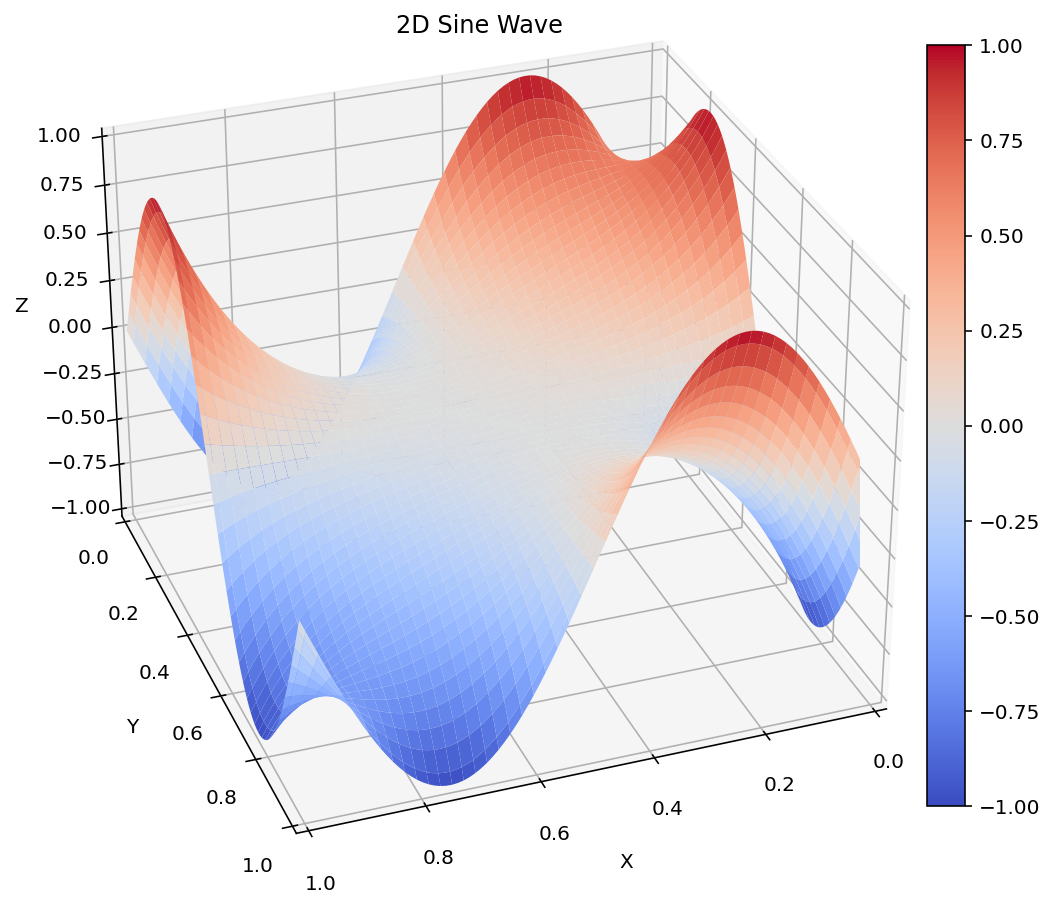

In [1]:
#The following code sample describes solving the 2D wave equation.
#This code will look at a 2D sine wave under initial conditions.
#There are a few different steps for doing this.


#STEP 1.  Import the libraries needed to perform the calculations.
#Import the numeric Python and plotting libraries needed to solve the equation.
#Also import the animation library to make a movie of how the wave amplitudes
#change over time.  Also include the Axes3D library to do a surface 3D plot.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D



#STEP 2.  Set up the position and time grids (or axes).
#Set up the position information.
axis_size = 100                                        #Size of the 1D grid.
side_length = 1                                        #Length of one side of one of the wave plot axes.
dx, dy = side_length/axis_size, side_length/axis_size  #Space step
axis_points = np.linspace(0,side_length,axis_size)     #Spatial grid points
c = 1/np.sqrt(2)                                       #Constant chosen in the 2D wave equation.

#Set up the time grid to calcuate the equation.
T =  20                                                #Total time (s)
dt = 0.5*(1/c) *(1/np.sqrt(dx**(-2) + dy**(-2)))       #Time step size to ensure a stable discretization scheme.
n = int(T/dt)                                          #Total number of time steps.



#STEP 3.  Initialization condition function for the 2D wave equation.  2D sine wave pattern in this example.
def initial_cond(x,y):
    return np.sin(2*np.pi*x + 2*np.pi*y)

#Create a meshgrid for the 3D function of initial wave.
X, Y = np.meshgrid(axis_points, axis_points)

#Calculate the first initial condition using the initialization function.  This is the initial
#wave state.
U = initial_cond(X, Y)

#Assign initial boundary conditions to their own variables.
B1 = U[:,0]
B2 = U[:,-1]
B3 = U[0,:]
B4 = U[-1,:]

#Set up matrix for the 2nd initial condition.
U1 = np.zeros((axis_size,axis_size))

#Calculate the 2nd initial condition needed for time iteration.
U1[1:-1,1:-1] = (U[1:-1, 1:-1] + (c**2/2)*(dt**2/dx**2)*(U[1:-1,0:-2] - 2*U[1:-1,1:-1] + U[1:-1, 2:]) +
     (c**2/2)*(dt**2/dy**2)*(U[0:-2,1:-1] - 2*U[1:-1,1:-1] + U[2:,1:-1]))

#Reinforce the boundary conditions on the surface after the 2nd initial condition.
U1[:,0] = B1
U1[:,-1] =B2
U1[0,:] = B3
U1[-1,:] = B4

#Assign these initial boundary conditions to their own variables.
B5 = U1[:,0]
B6 = U1[:,-1]
B7 = U1[0,:]
B8 = U1[-1,:]



#STEP 4.  Solve the PDE for a result of all spatial positions after
#time T has elapsed.
#Create a leading array to update the wave at every time step.  Initialize it with zeros.
U2 = np.zeros((axis_size,axis_size))

#Create an initialized array to store all the wave amplitude map images for each time point.
map_array = np.zeros((axis_size,axis_size,n))

#Initialize the first two slices of the array with the two initial wave maps.
map_array[:,:,0] = U
map_array[:,:,1] = U1

#Numerically solve the PDE by iteration over the specified total time.
for i in range(2,n):

    U2[1:-1,1:-1] = (2*U1[1:-1,1:-1] - U[1:-1,1:-1] + (c**2)*((dt/dx)**2)*(U1[1:-1,0:-2] - 2*U1[1:-1,1:-1] +
                    U1[1:-1, 2:]) + (c**2)*((dt/dy)**2)*(U1[0:-2,1:-1] - 2*U1[1:-1,1:-1] +
                    U1[2:, 1:-1]))

    #Direchlet boundary conditions for the wave.
    U2[:,0] = B5
    U2[:,-1] = B6
    U2[0,:] = B7
    U2[-1,:] = B8

    U1[:,0] = B5
    U1[:,-1] = B6
    U1[0,:] = B7
    U1[-1,:] = B8

    U[:,0] = B1
    U[:,-1] = B2
    U[0,:] = B3
    U[-1,:] = B4

    #Update the wave array with the 2D wave data.
    map_array[:,:,i] = U2

    #Update the trailing wave maps with the leading ones to prepare them for the next time loop iteration.
    U = U1
    U1 = U2



#STEP 5.  Animate the wave amplitudes as a movie to see how the
#wave amplitude changes over time.  For a movie animation showing the changes,
#we don't need every wave map.  The following array picks out a few of the wave maps
#to make the movie loop, using Numpy slicing.  There are many wave maps,
#so this takes every 20th map from the original array of waves.
movie_frames = map_array[:,:,0::20]

#Set up the plot template to animate the wave amplitude changes
#over time.  An initial figure needs to be generated along with the colormap plot
#and the associated labels and axes.
fig = plt.figure()

#Create a 3D projection view for the surface plot.
ax = fig.gca(projection = '3d')

#Generate an initial surface plot using the initial wave condition.  Set the grid size for plotting,
#colormap, range and mesh linewidth.
surf = (ax.plot_surface(X,Y,movie_frames[:,:,0], rstride=2, cstride=2,
                        cmap ='coolwarm', vmax = 1, vmin = -1, linewidth=1))

#Title of plot.
ax.set_title('2D Sine Wave')

#Add a colorbar to the plot.
fig.colorbar(surf)                         #Add a colorbar to the plot
ax.view_init(elev=30,azim=70)              #Elevation & angle initial view
ax.dist=8                                  #Viewing distance

#Axis limits and labels.
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([-1.0, 1.0])
ax.set_zlabel('Z')

#Define the animation update function.  In this function, each wave plot will be updated with the current frame.
def animate(i):
    ax.clear()
    surf = (ax.plot_surface(X,Y,movie_frames[:,:,i], rstride=2, cstride=2,
                        cmap ='coolwarm', vmax = 1, vmin = -1, linewidth=1))
    ax.view_init(elev=30,azim=70)              #Elevation & angle initial view
    ax.dist=8                                  #Viewing distance

    #Axis limits and labels.
    ax.set_xlim3d([0.0, 1.0])
    ax.set_xlabel('X')

    ax.set_ylim3d([0.0, 1.0])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-1.0, 1.0])
    ax.set_zlabel('Z')
    ax.set_title('2D Sine Wave')

    return surf

#Call the full animation function.  The number of frames is given by the last element of the shape tuple of
#of the movie frames array.
anim = animation.FuncAnimation(fig, animate, frames = movie_frames.shape[2])

#Save the animation as an avi movie file to be played at 30 frames per second.
anim.save('wave_animation.avi', fps = 30)

#Display the resulting animated wave map, which shows how wave amplitude changes over time.
plt.show()